### CSC 820 NLT HW 13
### Sentiment Classification using Feed Forward Neural Network in PyTorch
* > Khalid Mehtab Khan
* > SFSU ID: 923673423

In [1]:
import pandas as pd

## Data Extraction
- In this step, we convert our data from a JSON file to a CSV file.
- We aim to strip the important information and put it in a structure that is usable and efficient.
- This code only needs to be run once for both models.
- It outputs a CSV file "output_reviews_top.csv" which can be used for modeling.


In [2]:
# def load_yelp_orig_data():
#     PATH_TO_YELP_REVIEWS = 'yelp_dataset/yelp_academic_dataset_review.json'

#     # read the entire file into a python array
#     with open(PATH_TO_YELP_REVIEWS, 'r') as f:
#         data = f.readlines()

#     # remove the trailing "\n" from each line
#     data = map(lambda x: x.rstrip(), data)

#     data_json_str = "[" + ','.join(data) + "]"

#     # now, load it into pandas
#     data_df = pd.read_json(data_json_str)

#     data_df.head(100000).to_csv('output_reviews_top.csv')

# load_yelp_orig_data()

## Loading the Dataset
- loading the dataset from the previously generated CSV file.
- If running on Google Colaboratory, you need to upload the "output_reviews_top.csv" file to the runtime.
- The code snippet to mount Google Drive and copy the CSV file is provided (uncomment if needed).
- the last two lines load the data set in the variable `top_data_df`

In [3]:
# if runnig on google colaboratory
# upload the output_reviews_top.csv file to the runtime

# Uncomment the following code

# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/My\ Drive/output_reviews_top.csv .


top_data_df = pd.read_csv('output_reviews_top.csv')
top_data_df.head()



,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Data Mapping
- We map star ratings in the dataset to sentiment categories in the part.
- We use the `value_counts` method to count the number of reviews for each star rating.
- The `map_sentiment` function maps the star ratings to three sentiment categories: negative (-1), neutral (0), and positive (1).
- The new sentiment values are added to the DataFrame in a new column "sentiment".
- Finally, we plot the distribution of sentiments to visualize the data.


Number of rows per star rating:
5    44392
4    25337
3    11362
1    10921
2     7988
Name: stars, dtype: int64


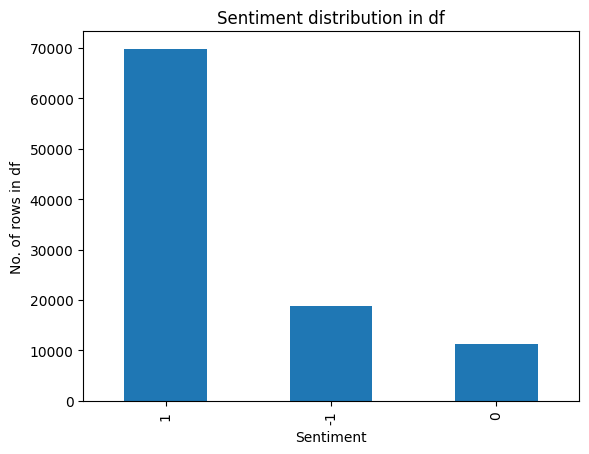

In [4]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

* > Observations
- We can observe that the positive sentiment (label 1) has the highest number of reviews.
- The negative sentiment (label -1) has a moderate number of reviews.
- The neutral sentiment (label 0) has the least number of reviews.

- to get equal dist of all classes

- Try to balance the number of classes in both the sets so that the results are not biased

## Sampling Data
- to ensure  we have a balanced dataset 
- we select the top N samples from each sentiment category.
- The function `get_top_data` selects the top N positive, negative, and neutral reviews.
- These subsets are concatenated into a new DataFrame.
- It returns this balanced subset.
- top 10,000 samples from each sentiment category are selected


In [5]:
def get_top_data(top_n = 5000):
    top_data_df_positive = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
 1    10000
-1    10000
 0    10000
Name: sentiment, dtype: int64


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
6,6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1
7,7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1
10,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,1
11,11,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,1
12,12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,1
13,13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,1
14,14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,1


## Data PreProcessing

* > Remove Stop Words
- Gensim's `remove_stopwords` function.
- Stop words are common words (like "the", "and", "is") that may not add significant meaning to the text analysis.
- However, removing stop words can sometimes change the context of a sentence, which is why stop word removal is not implemented in this project.
- The examples show how sentences look after removing stop words.


In [6]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

Restaurant good service!!
I like food!!
This product good!!


- As Stopwords change will change the context of the sentence we want to capture, removal of sstop words is not implemented here

* > Tokenizing Text Data
- This code block tokenizes the text data in the dataset.
- it converts text into individual words or tokens
- We use Gensim's `simple_preprocess` function to tokenize the text in the 'text' column.
- The tokenized text is stored in a new column 'tokenized_text'.


In [7]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']] 
print(top_data_df_small['tokenized_text'].head(10))

1     [ve, taken, lot, of, spin, classes, over, the,...
3     [wow, yummy, different, delicious, our, favori...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [loved, this, tour, grabbed, groupon, and, the...
7     [amazingly, amazing, wings, and, homemade, ble...
10    [my, experience, with, shalimar, was, nothing,...
11    [locals, recommended, milktooth, and, it, an, ...
12    [love, going, here, for, happy, hour, or, dinn...
13    [good, food, loved, the, gnocchi, with, marina...
14    [the, bun, makes, the, sonoran, dog, it, like,...
Name: tokenized_text, dtype: object


* > Stemming Text Data
- This cell performs stemming on the tokenized text data.
- reducing words to their base or root form.
- We use Gensim's `PorterStemmer` for stemming.
- Each token in the 'tokenized_text' column is stemmed and stored in a new column 'stemmed_tokens'.


In [8]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

1     [ve, taken, lot, of, spin, class, over, the, y...
3     [wow, yummi, differ, delici, our, favorit, is,...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [love, thi, tour, grab, groupon, and, the, pri...
7     [amazingli, amaz, wing, and, homemad, bleu, ch...
10    [my, experi, with, shalimar, wa, noth, but, wo...
11    [local, recommend, milktooth, and, it, an, ama...
12    [love, go, here, for, happi, hour, or, dinner,...
13    [good, food, love, the, gnocchi, with, marinar...
14    [the, bun, make, the, sonoran, dog, it, like, ...
Name: stemmed_tokens, dtype: object

* >Train-Test Split
- We use `train_test_split` from scikit-learn to split the data.
- The function `split_train_test` takes the dataset, 
- splits it into training (70%) and testing (30%) sets, and shuffles the data.
- It returns the features (`X_train`, `X_test`) and labels (`Y_train`, `Y_test`) for both sets.
- The function also prints the distribution of sentiments in the training and testing sets to ensure the split is balanced.


In [9]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_small['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
 1    7036
-1    7008
 0    6956
Name: sentiment, dtype: int64
Value counts for Test sentiments
 0    3044
-1    2992
 1    2964
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool                 date  funny  \
0  41964  h7zxeLAdUyAO6S6UzXJDwA     0  2018-05-20 02:15:46      0   
1  21237  ySXKjndttZjNy3kcqRqG3g     0  2015-12-20 20:30:12      0   
2  43742  9gObo5ltOMo6UgsaXaHPWA     0  2015-12-05 23:57:22      0   
3  35107  tvbFcYCEQWc76CUK-nBw8w     0  2018-07-27 08:09:21      0   
4   2960  Yv6HUVu7fRMnt_NtGdVQBw     0  2018-06-19 18:16:51      0   

                review_id  stars  \
0  xkcYjM_5w9rdSiN8_Qz_Tg      1   
1  XIYnB19-LAI_yzJfB2d7eQ      3   
2  Nm2XaG0sQ7p3LHoZG44cAg      1   
3  L8Ape_IoEHiMjgiufwCp8Q      3   
4  0uD1hdeUNPyfAaGOKpMMeQ      5   

                                                text  useful  \
0  Kids talking and being disru

## Setting up the Environment

* > Setting Up PyTorch Device
- This cell sets up the PyTorch environment and selects the device for running the model.
- It imports necessary PyTorch libraries for building and training neural networks.
- The device is set to "cuda" if a GPU is available, otherwise it falls back to "cpu".


- Main advantage of using PyTorch is that you can run the computations on gpu for faster speed.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

* > Steps in PyTorch for NN Model
- Define the NN model
- Override the forward function
- Initialise Optimisation and loss function for training
- Iterate over dataset of inputs
- Compute the loss
- Propagate gradients back into the network’s parameters
- Update the weights and biases

## Feed Forward Neural Network

* > Model:
- This cell defines the architecture of the feedforward neural network model using PyTorch.

  - Activation Function: ReLU
  - Number of Hidden Layers: 2
  - Dimension of Hidden Layer: 500

  - We use sfotmax as the output function as we have 3 classes.
  
- The model creates and connects nodes in the following manner:
  - Input layer to first hidden layer with 500 units
  - First hidden layer to second hidden layer with 500 units
  - Second hidden layer to output layer with 3 units (corresponding to sentiment classes)


In [13]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return F.softmax(out, dim=1)

* > Dictionary for Tokenized Words
- This cell creates a dictionary from the tokenized text data.
- The dictionary maps each unique word to a unique integer ID.
- We create the dictionary without padding for the basic models.


In [14]:
from gensim import corpora
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict

# Make the dictionary without padding for the basic models
review_dict = make_dict(top_data_df_small, padding=False)

Dictionary without padding


- Making each input into a vector

In [15]:
len(review_dict)

26780

* > BOW vectors
- The `VOCAB_SIZE` is determined by the length of the dictionary created from the tokenized text data.
- The `NUM_LABELS` is set to 3, corresponding to the three sentiment classes (positive, neutral, negative).
- The function `make_bow_vector` converts a sentence into a bag-of-words (BoW) vector.
- This vector is used as input to the neural network.


In [16]:
VOCAB_SIZE = len(review_dict)
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

- converting output to tensors

- The function `make_target` maps the sentiment labels (-1, 0, 1) to corresponding class indices (0, 1, 2).
  - A label of -1 (negative sentiment) is mapped to index 0.
  - A label of 0 (neutral sentiment) is mapped to index 1.
  - A label of 1 (positive sentiment) is mapped to index 2.
- The function returns the target tensor in the format required by PyTorch.

In [17]:
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

## Setting Up the Model
- In this step, we set the parameters for our model.
- We are using a Feedforward Neural Network.
- For this part, we are using CrossEntropyLoss as the loss function.
- The optimizer used is Stochastic Gradient Descent (SGD) with a learning rate of 0.001.
- The model parameters include:
  - `input_dim` set to the vocabulary size.
  - `hidden_dim` set to 500, representing the size of the hidden layers.
  - `output_dim` set to 3, corresponding to the three sentiment classes.
  - `num_epochs` set to 100, indicating the number of training iterations.


In [18]:
VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 100

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)

## Model Training
- In this step, we train the feedforward neural network model.
- We run the model for 100 epochs and save the results.
- The training loss for each epoch is saved to a CSV file.
- We save the average loss for the epoch to the file.
-
- The code iterates over the NN model repeatedly to update the weights of the predictors after each iteration using the loss.
- The calculation of the weights, is don using backpropagation.

In [22]:
ffnn_loss_file_name = 'ffnn_bow_class_big_loss_500_epoch_100_less_lr_model1.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Start training
for epoch in range(num_epochs):
    if (epoch+1) % 25 == 0:
        print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        # Clearing the accumulated gradients
        optimizer.zero_grad()

        # Make the bag of words vector for stemmed tokens 
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
       
        # Forward pass to get output
        probs = ff_nn_bow_model(bow_vec)

        # Get the target label
        target = make_target(Y_train['sentiment'][index])

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(probs, target)
        # Accumulating the loss over time
        train_loss += loss.item()

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0

f.close()

Epoch completed: 25
Epoch completed: 50
Epoch completed: 75
Epoch completed: 100


## Testing  Model
- We use the test dataset to make predictions and evaluate the model's performance.
- The `classification_report` from scikit-learn is used to print a detailed report of the model's performance.
- 
- The Classification Report:
    - We can see that the overall accuracy and individual class accuracy measures.
- We plot the training loss over epochs and save the plot as a PDF.


              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2992
           1       0.65      0.59      0.62      3044
           2       0.73      0.84      0.78      2964

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.72      9000
weighted avg       0.72      0.72      0.72      9000

100
Index(['iter', ' loss'], dtype='object')


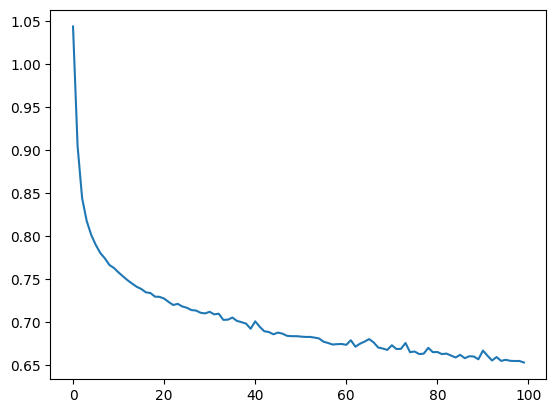

In [24]:
from sklearn.metrics import classification_report
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
fig = ffnn_plt_500_padding_100_epochs.get_figure()
fig.savefig("ffnn_bow_loss_500_padding_100_epochs_less_lr_model1.pdf")